In [171]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window
from rasterio import features
from rasterio import Affine
from geopandas import GeoDataFrame

from collections import OrderedDict

from skimage import data, util, filters, color
from skimage.morphology import watershed, disk
from skimage.filters import rank

from scipy import ndimage as ndi

In [172]:
%matplotlib inline

In [173]:
%pwd

'/home/jovyan/learn_python'

In [174]:
src = rasterio.open("image.tif")

In [175]:
src.count

4

In [176]:
src.shape

(6000, 6000)

In [177]:
x_corner = 3000
y_corner = 3000
x_inc = 500
y_inc = 500

In [184]:
image = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, y_inc))

In [203]:
for x_start in range(x_corner, src.width, x_inc):
    print(x_start)

3000
3500
4000
4500
5000
5500


In [204]:
image = src.read([1,2,3], window = Window(x_start, y_corner, x_inc, y_inc))

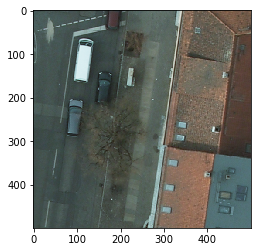

In [205]:
show(image)

In [206]:
type(image)

numpy.ndarray

In [207]:
image.shape

(3, 500, 500)

In [208]:
img = image[0, :, :]

In [209]:
img.shape

(500, 500)

In [210]:
edges = filters.sobel(img)
grid = util.regular_grid(img.shape, n_points=200)
seeds = np.zeros(img.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

In [211]:
w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.01)

In [212]:
type(w0)

numpy.ndarray

In [213]:
w0.shape

(500, 500)

In [214]:
w0.max()

196

In [215]:
w0.min()

1

In [216]:
w0

array([[155, 155, 155, ..., 155, 155, 155],
       [155, 155, 155, ..., 155, 155, 155],
       [155, 155, 155, ..., 155, 155, 155],
       ...,
       [155, 155, 155, ..., 155, 155, 155],
       [155, 155, 155, ..., 155, 155, 155],
       [155, 155, 155, ..., 155, 155, 155]], dtype=int32)

In [217]:
type(w1)

numpy.ndarray

In [218]:
w1.shape

(500, 500)

In [219]:
w1

array([[  1,   1,   1, ...,  14,  14,  14],
       [  1,   1,   1, ...,  14,  14,  14],
       [  1,   1,   1, ...,  14,  14,  14],
       ...,
       [183, 183, 183, ..., 196, 196, 196],
       [183, 183, 183, ..., 196, 196, 196],
       [183, 183, 183, ..., 196, 196, 196]], dtype=int32)

In [220]:
w1.max()

196

In [221]:
w1.min()

1

In [222]:
rasterio.transform.xy (src.transform, 0, 0)

(367276.525, 5807362.574999999)

In [223]:
src.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [224]:
src.transform*(3000, 3000)

(367426.5, 5807212.6)

In [225]:
for i in range (3000, 3500 + 1, 500):
    print (i)

3000
3500


In [226]:
src.transform*(3500, 500)

(367451.5, 5807337.6)

In [227]:
ax0.imshow(color.label2rgb(w0, img))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, img))
ax1.set_title('Compact watershed')

Text(0.5, 1, 'Compact watershed')

In [228]:
plt.show()

In [229]:
a = src.transform
affine2 = Affine(a.a, a.b, (src.transform * (3000, 3000)) [0], a.d, a.f, (src.transform * (3000, 3000)) [1])
print (affine2)

| 0.05, 0.00, 367426.50|
| 0.00, 5807362.60, 5807212.60|
| 0.00, 0.00, 1.00|


In [230]:
test = w1[np.newaxis, :, :]

In [231]:
test.shape

(1, 500, 500)

In [232]:
shps = features.shapes(test, transform=affine2)
records = []

for id, shp in enumerate(shps):
    if shp[1] != 0:
        item = {'geometry': shp[0], 'id': id+1, 'properties': 
                OrderedDict([('dn', np.int(shp[1]))]),
                'type': 'Feature'}
        records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [233]:
vec

,geometry,dn
0,"POLYGON ((367426.5 5807212.6, 367426.5 2090649...",1
1,"POLYGON ((367438.75 5807212.6, 367438.75 20906...",8
2,"POLYGON ((367440.5 5807212.6, 367440.5 2090649...",9
3,"POLYGON ((367445.75 5807212.6, 367445.75 20325...",12
4,"POLYGON ((367449.25 5807212.6, 367449.25 20906...",14
5,"POLYGON ((367435.25 5807212.6, 367435.25 14518...",6
6,"POLYGON ((367437 5807212.6, 367437 17421937.8,...",7
7,"POLYGON ((367444 5807212.6, 367444 29036663, 3...",11
8,"POLYGON ((367428.25 5807212.6, 367428.25 19745...",2
9,"POLYGON ((367430 5807212.6, 367430 197450178.4...",3


In [234]:
vec.to_file("output.shp")

In [113]:
%pwd

'/home/jovyan/learn_python'

In [50]:
%cd wk2

/home/jovyan/learn_python/wk2


In [51]:
%pwd

'/home/jovyan/learn_python/wk2'

In [52]:
%system ls

['Learning Python 3.ipynb',
 'Mapping and visualization.ipynb',
 'RasterioInDepth.ipynb']

In [53]:
%dirs

[]

In [54]:
%system cd ..
%system pwd

['/home/jovyan/learn_python/wk2']

In [55]:
%cd ..
%pwd

/home/jovyan/learn_python


'/home/jovyan/learn_python'

In [57]:
%dirs

[]

In [58]:
%dhist

Directory history (kept in _dh)
0: /home/jovyan/learn_python
1: /home/jovyan/learn_python/wk2
2: /home/jovyan/learn_python


In [59]:
src.close()

In [61]:
rasterio.Env

rasterio.env.Env